In [10]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import matplotlib.patches as patches
import pandas as pd
from astropy.visualization import simple_norm
from astropy import wcs
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1.inset_locator import TransformedBbox, BboxPatch, BboxConnector
from matplotlib.transforms import Bbox
from astropy.io import ascii
from astropy import units as u
from astropy import coordinates
from astropy.coordinates import SkyCoord

In [2]:
file_E = open("W51-E_relitent-all.txt", "r")
data_E = file_E.readlines()

Numbers_E = []  # will be a list of date/times
RA_E = []  # will be a list of water levels
DEC_E = []
for i in range(98):
    line_E = data_E[i+1]
    elements_E = line_E.split( )
    Numbers_E.append(int(elements_E[0]))
    RA_E.append(float(elements_E[1]))
    DEC_E.append(float(elements_E[2]))

In [3]:
file_IRS2 = open("W51-IRS2_relitent-all.txt", "r")
data_IRS2 = file_IRS2.readlines()

Numbers_IRS2 = []  # will be a list of date/times
RA_IRS2 = []  # will be a list of water levels
DEC_IRS2 = []
for i in range(98):
    line_IRS2 = data_IRS2[i+1]
    elements_IRS2 = line_IRS2.split( )
    Numbers_IRS2.append(int(elements_IRS2[0]))
    RA_IRS2.append(float(elements_IRS2[1]))
    DEC_IRS2.append(float(elements_IRS2[2]))

In [4]:
print(RA_E)

[290.9329071, 290.9331873, 290.9329538, 290.9328126, 290.9327562, 290.9322463, 290.9324401, 290.9324501, 290.9327182, 290.9325957, 290.9334756, 290.9330429, 290.9319921, 290.9255676, 290.9332882, 290.933406, 290.9315049, 290.9325704, 290.9424385, 290.9327629, 290.942675, 290.9299437, 290.9244359, 290.9326281, 290.9336632, 290.9299886, 290.9337907, 290.929612, 290.9339054, 290.9298903, 290.9327694, 290.9298847, 290.925897, 290.9318138, 290.9310141, 290.930936, 290.932128, 290.9324861, 290.9303851, 290.9336993, 290.9334207, 290.9277531, 290.933521, 290.9325604, 290.9262258, 290.9332126, 290.9275855, 290.9331529, 290.932817, 290.9329154, 290.9290377, 290.9335685, 290.9341342, 290.9247283, 290.9288174, 290.9266622, 290.9326028, 290.9337035, 290.930762, 290.9332711, 290.9338052, 290.9322129, 290.9228256, 290.9318195, 290.932688, 290.9429562, 290.9331036, 290.9336788, 290.9308511, 290.9242695, 290.9324134, 290.9332295, 290.9286003, 290.9286748, 290.9245042, 290.9316339, 290.9312995, 290.9344

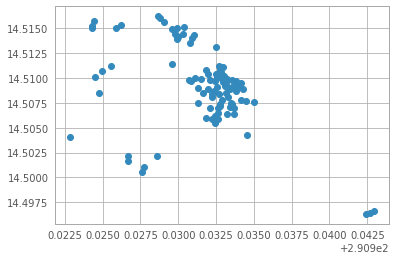

In [5]:
plt.scatter(RA_E, DEC_E)
plt.show()

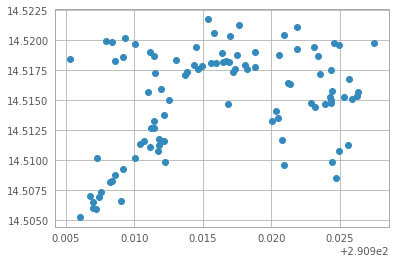

In [6]:
plt.scatter(RA_IRS2, DEC_IRS2)
plt.show()

In [16]:
c=SkyCoord(RA_IRS2, DEC_IRS2, frame='icrs', unit='deg')

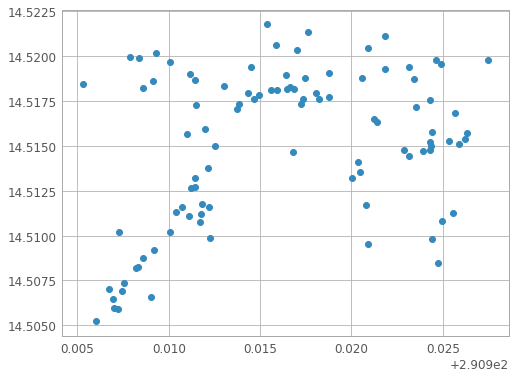

In [23]:
plt.scatter(c.ra, c.dec)
plt.show()

In [7]:
image_file2 ='/orange/adamginsburg/w51/ALMA-IMF_W51/W51-IRS2/B3/cleanest/W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_preselfcal.image.tt0.pbcor.fits'

In [8]:
hdu_list2 = fits.open(image_file2)
hdu_list2.info()
image_data2 = hdu_list2[0].data
image_data2 = np.squeeze(image_data2)
header_IRS2 = hdu_list2['PRIMARY'].header
hdu_list2.close()
wcs_IRS2= wcs.WCS(header_IRS2)

Filename: /orange/adamginsburg/w51/ALMA-IMF_W51/W51-IRS2/B3/cleanest/W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_preselfcal.image.tt0.pbcor.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      76   (3840, 3840, 1, 1)   float32   


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


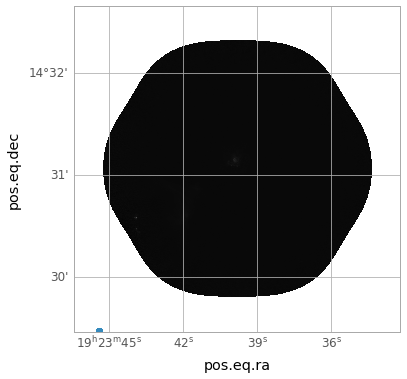

In [24]:
ax = plt.subplot(projection=wcs_IRS2.celestial)
# def make_scalebar(ax, left_side, length, color='w', linestyle='-', label='',
#                   fontsize=12, text_offset=0.1*u.arcsec, coordsys='icrs'):
#     axlims = ax.axis()
#     lines = ax.plot(u.Quantity([left_side.ra, left_side.ra-length]),
#                     u.Quantity([left_side.dec]*2),
#                     color=color, linestyle=linestyle, marker=None,
#                     transform=ax.get_transform(coordsys),
#                    )
#     txt = ax.text((left_side.ra-length/2).to(u.deg).value,
#                   (left_side.dec+text_offset).to(u.deg).value,
#                   label,
#                   verticalalignment='bottom',
#                   horizontalalignment='center',
#                   transform=ax.get_transform(coordsys),
#                   color=color,
#                   fontsize=fontsize,
#                  )
#     ax.axis(axlims)
#     return lines,txt

# make_scalebar(ax, coordinates.SkyCoord('19:23:43.95 +14:30:34.0', unit=(u.hour, u.deg), frame='icrs'),
#               length=0.2*u.arcsec, label='0.2" = 1000 AU', fontsize=14, text_offset=0.02*u.arcsec)
ax.imshow(image_data2, cmap='gray', interpolation="nearest",
          origin="lower")
# make_scalebar(ax, coordinates.SkyCoord('19:23:43.95 +14:30:34.0', unit=(u.hour, u.deg), frame='icrs'),
#               length=0.2*u.arcsec, label='0.2" = 1000 AU', fontsize=14, text_offset=0.02*u.arcsec)
plt.scatter(c.ra, c.dec)
plt.show()

In [25]:
image_file3 ='/orange/adamginsburg/w51/w51-alma-longbaseline/FITS/W51n_cont_uniform.image.tt0.pbcor.fits'

In [26]:
hdu_list3 = fits.open(image_file3)
hdu_list3.info()
image_data3 = hdu_list3[0].data
image_data3 = np.squeeze(image_data3)
header3 = hdu_list3['PRIMARY'].header
hdu_list3.close()
wcs3 = wcs.WCS(header3)

Filename: /orange/adamginsburg/w51/w51-alma-longbaseline/FITS/W51n_cont_uniform.image.tt0.pbcor.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   (5120, 5120)   float32   


indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


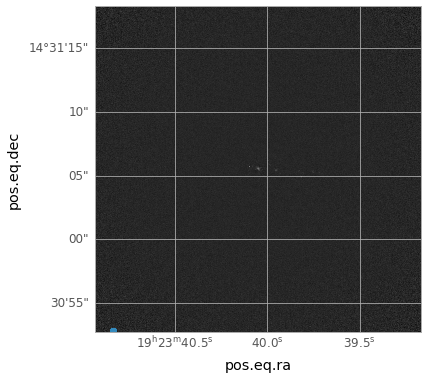

In [28]:
ax = plt.subplot(projection=wcs3.celestial)
ax.imshow(image_data3, cmap='gray', interpolation="nearest",
          origin="lower")
plt.scatter(c.ra, c.dec)
plt.show()

In [29]:
c.dec

<Latitude [14.5181787, 14.5116014, 14.5157551, 14.5181627, 14.5185939,
           14.5126613, 14.518088 , 14.5181301, 14.5092092, 14.5152353,
           14.5112736, 14.5176002, 14.517741 , 14.5113187, 14.5182982,
           14.515084 , 14.510206 , 14.5147605, 14.5153542, 14.5084575,
           14.5150079, 14.5112169, 14.518247 , 14.5170718, 14.5064864,
           14.5195848, 14.5107335, 14.5098696, 14.5171612, 14.5194112,
           14.5179648, 14.5132333, 14.5052417, 14.5111033, 14.5186803,
           14.5178224, 14.5116986, 14.5187168, 14.5189576, 14.5197824,
           14.5082707, 14.519011 , 14.5211226, 14.509555 , 14.5176025,
           14.5146479, 14.506939 , 14.508742 , 14.512703 , 14.5183395,
           14.5187825, 14.5107862, 14.5117332, 14.5213181, 14.511578 ,
           14.5187622, 14.5196865, 14.5073556, 14.5137446, 14.5176121,
           14.5059806, 14.5082006, 14.5184679, 14.5098001, 14.5132205,
           14.5070005, 14.5175623, 14.5147588, 14.5152438, 14.519895 ,
      